<a href="https://colab.research.google.com/github/Giridhar-github/project/blob/main/audioemotiondataexploration_reverif_samplepynb4444_feb21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyAudio
!pip install ffmpeg
!pip install librosa
!pip install spleeter
!pip install playsound
!pip install sklearn
!pip install PySoundFile
!pip install pydub
!pip install PySoundFile
!pip install audioread

  ERROR: Failed building wheel for PyAudio
  Running setup.py clean for PyAudio
Failed to build PyAudio
    Running setup.py install for PyAudio ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-g22msh0r/pyaudio_59e9dbbfe76d40e6b989c958856612ae/setup.py'"'"'; __file__='"'"'/tmp/pip-install-g22msh0r/pyaudio_59e9dbbfe76d40e6b989c958856612ae/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-1d8ja_ph/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/PyAudio Check the logs for full command output.
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=62f86fc64aa3099bc6b7ffa8bab4b4895096187190a14854cc5f15c708e7eb08
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


# <center>Audio Emotion classifier</center>
## <center>Part 1 - Data Exploration</center>

- Surrey Audio-Visual Expressed Emotion [(SAVEE)](https://www.kaggle.com/ejlok1/surrey-audiovisual-expressed-emotion-savee)
- Ryerson Audio-Visual Database of Emotional Speech and Song [(RAVDESS)](https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio)
- Toronto emotional speech set [(TESS)](https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess)
- Crowd-sourced Emotional Mutimodal Actors Dataset [(CREMA-D)](https://www.kaggle.com/ejlok1/cremad)

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'


In [3]:
!chmod 600 ~/.content/kaggle.json

chmod: cannot access '/root/.content/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
!kaggle datasets download -d ejlok1/cremad

 92% 99.0M/107M [00:00<00:00, 120MB/s]
100% 107M/107M [00:00<00:00, 167MB/s] 
 99% 427M/429M [00:03<00:00, 141MB/s]
100% 429M/429M [00:03<00:00, 146MB/s]
 97% 415M/428M [00:03<00:00, 141MB/s]
100% 428M/428M [00:03<00:00, 144MB/s]
 99% 448M/451M [00:04<00:00, 139MB/s]
100% 451M/451M [00:04<00:00, 109MB/s]


In [5]:
!unzip \*.zip && rm \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: AudioWAV/1031_IEO_HAP_LO.wav  
  inflating: AudioWAV/1031_IEO_HAP_MD.wav  
  inflating: AudioWAV/1031_IEO_NEU_XX.wav  
  inflating: AudioWAV/1031_IEO_SAD_HI.wav  
  inflating: AudioWAV/1031_IEO_SAD_LO.wav  
  inflating: AudioWAV/1031_IEO_SAD_MD.wav  
  inflating: AudioWAV/1031_IOM_ANG_XX.wav  
  inflating: AudioWAV/1031_IOM_DIS_XX.wav  
  inflating: AudioWAV/1031_IOM_FEA_XX.wav  
  inflating: AudioWAV/103

In [6]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
from pydub import AudioSegment
import warnings
from sklearn import model_selection, svm
from scipy.io.wavfile import read, write
from IPython.display import Audio
# import PySoundFile
import audioread
import spleeter
import ffmpeg
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [7]:
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

SAVEE="/content/ALL/"
TESS="/content/tess toronto emotional speech set data//TESS Toronto emotional speech set data/"
RAV="/content/audio_speech_actors_01-24/"
CREMA="/content/AudioWAV/"

# Run one example 
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['KL_n14.wav', 'KL_f02.wav', 'JE_a03.wav', 'DC_a11.wav', 'KL_d08.wav']

<a id="savee"></a>
##  <center> 1. SAVEE dataset <center>
The audio files (**all male speakers only**) are named in such a way that the prefix letters describes the emotion classes as follows:
- 'a' = 'anger'
- 'd' = 'disgust'
- 'f' = 'fear'
- 'h' = 'happiness'
- 'n' = 'neutral'
- 'sa' = 'sadness'
- 'su' = 'surprise' 

<a id="savee_load"></a>
###  Load the dataset 

In [8]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
# remind: they are all male speakers only.
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)

In [9]:
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])],axis=1)
NSAVEE=SAVEE_df.labels.value_counts()
SAVEE_df.head()

labels source                     path
0  male_neutral  SAVEE  /content/ALL/KL_n14.wav
1     male_fear  SAVEE  /content/ALL/KL_f02.wav
2    male_angry  SAVEE  /content/ALL/JE_a03.wav
3    male_angry  SAVEE  /content/ALL/DC_a11.wav
4  male_disgust  SAVEE  /content/ALL/KL_d08.wav

<a id="savee_explore"></a>
### Explore the data
The below wave plot is a graphical representation of a sound wave vibration overtime. Its in this wave that we need to find the key pattern that will help us distinguish the different emotions. 

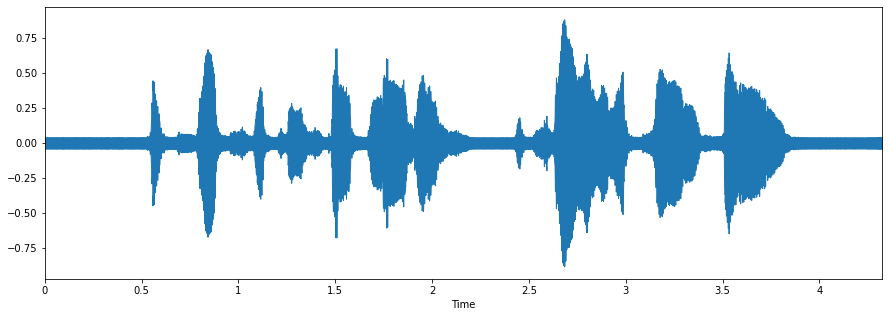

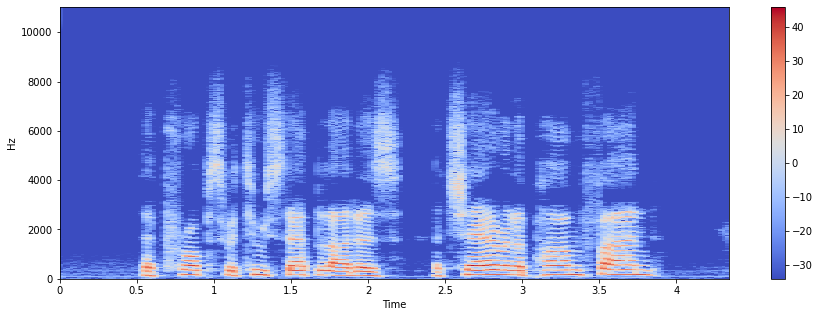

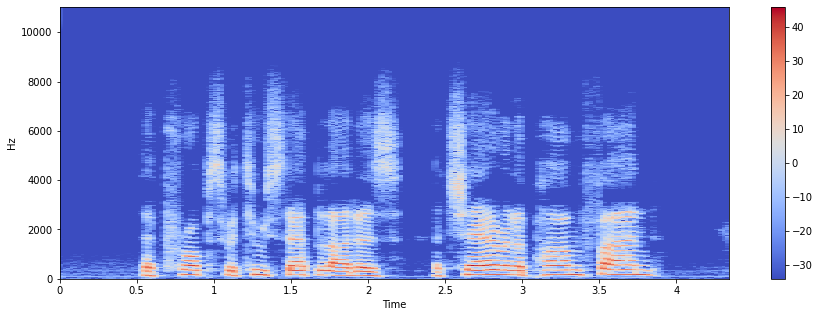

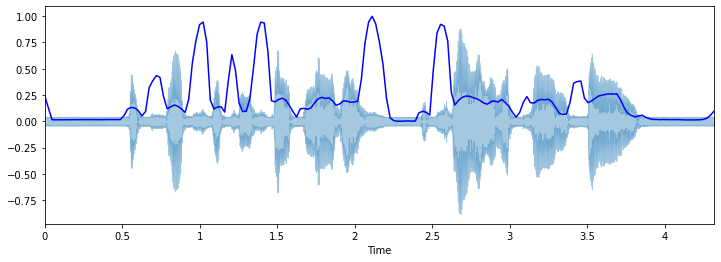

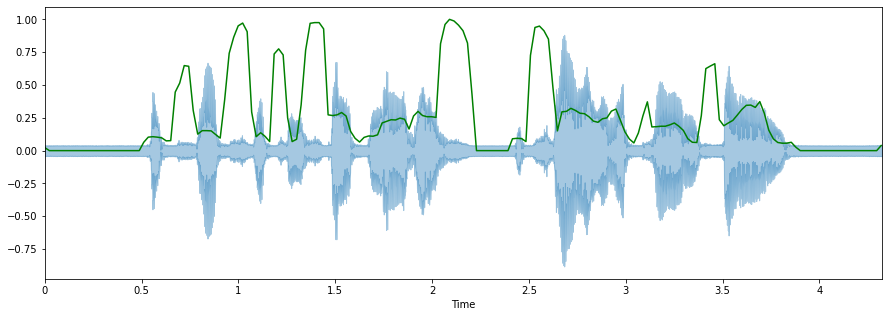

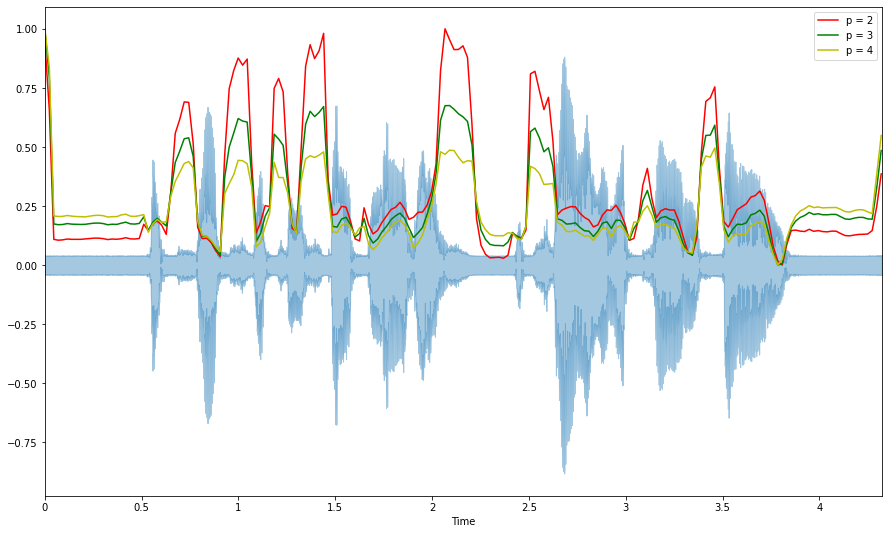

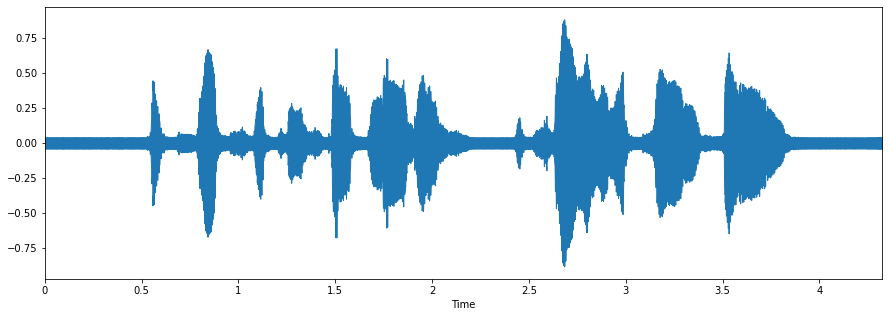

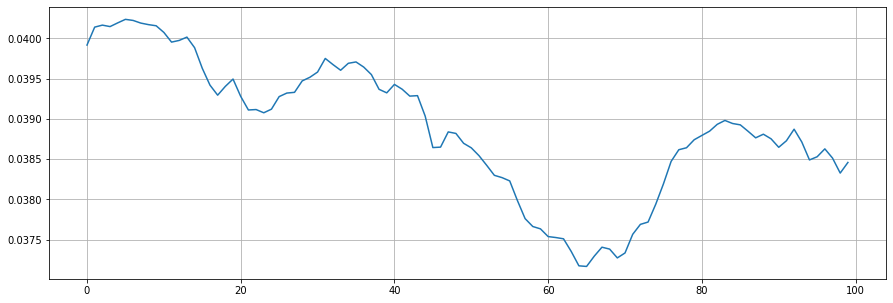

In [10]:
# fear emotion track
# use the well known Librosa library for this task 
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#create an Audio Signal------------------------------------------
sampling_rate=22050
T=5.0 #seconds
t=np.linspace(0,T,int(T*sampling_rate), endpoint=False) #time variable
x=0.5*np.sin(2*np.pi*220*t) #pure sine wave at 220Hz
ipd.Audio(x,rate=sampling_rate) #load a numpy array
#-----------------------------------------------------------------

#code to spectral centroid-------------------------------------------
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#---------------------------------------------------------------------

#code to spectral rolloff--------------------------------------------
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')
#----------------------------------------------------------------------

#code to spectral Bandwidth----------------------------------------------------
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#-------------------------------------------------------------------------

#code to Zero-cross rate-------------------------------------------------
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)
n0=9000
n1=9100
plt.figure(figsize=(15,5))
plt.plot(data[n0:n1])
plt.grid()
#--------------------------------------------------------------------------


# play the audio 
ipd.Audio(fname)

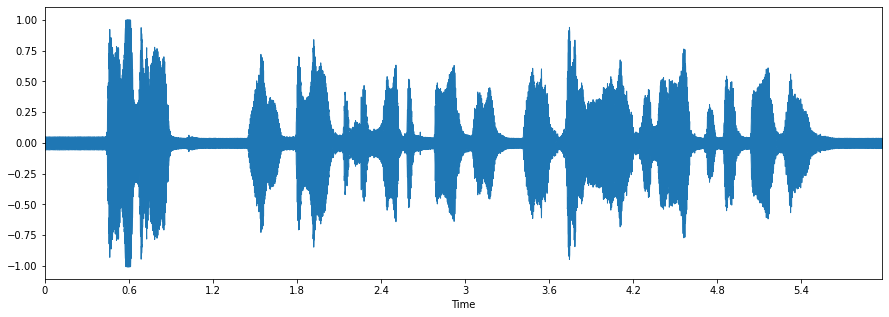

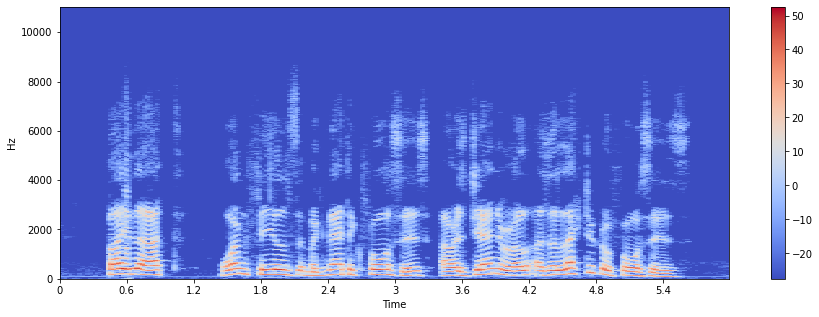

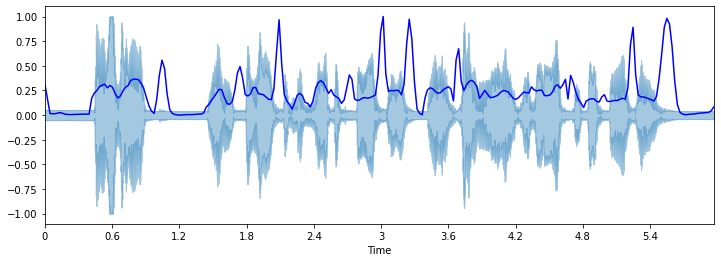

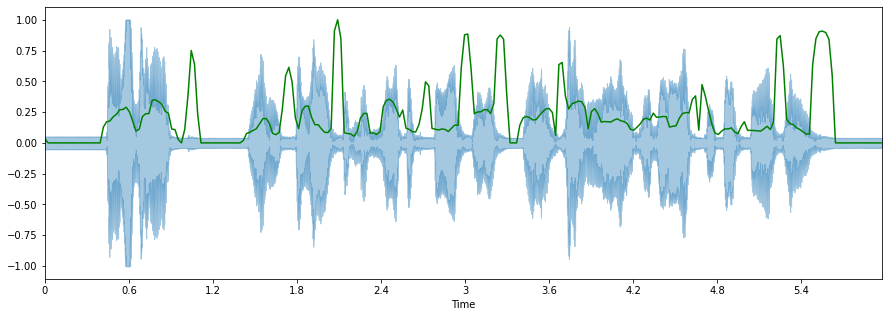

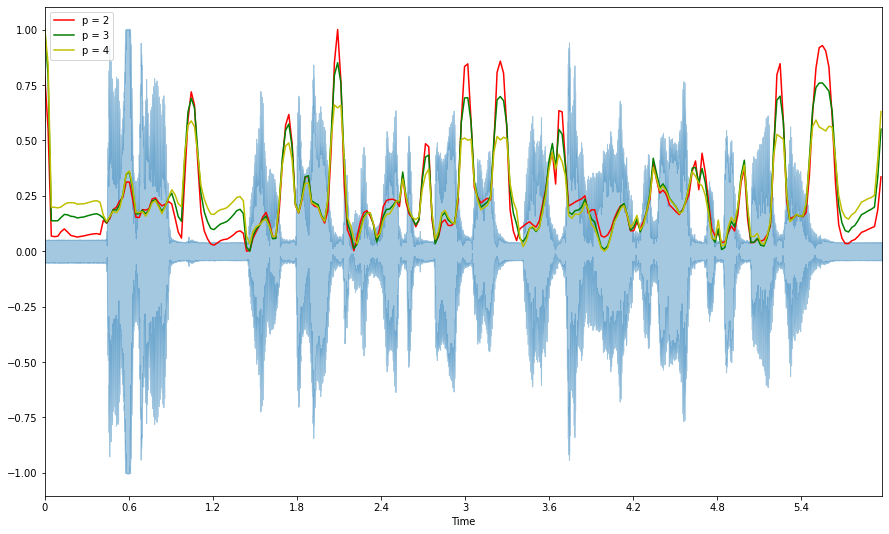

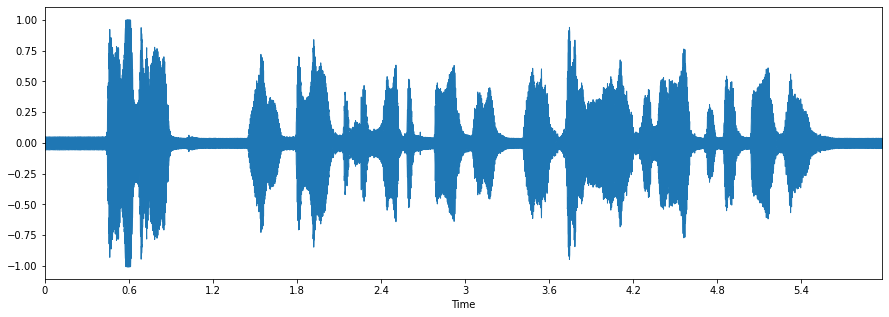

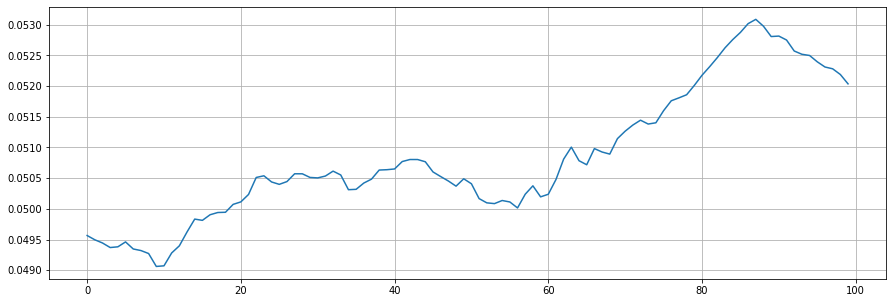

In [11]:
# a happy emotion track
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#create an Audio Signal------------------------------------------
sampling_rate=22050
T=5.0 #seconds
t=np.linspace(0,T,int(T*sampling_rate), endpoint=False) #time variable
x=0.5*np.sin(2*np.pi*220*t) #pure sine wave at 220Hz
ipd.Audio(x,rate=sampling_rate) #load a numpy array
#-----------------------------------------------------------------

#code to spectral centroid-------------------------------------------
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#---------------------------------------------------------------------

#code to spectral rolloff--------------------------------------------
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')
#----------------------------------------------------------------------

#code to spectral Bandwidth----------------------------------------------------
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#-------------------------------------------------------------------------

#code to Zero-cross rate-------------------------------------------------
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)
n0=9000
n1=9100
plt.figure(figsize=(15,5))
plt.plot(data[n0:n1])
plt.grid()
#--------------------------------------------------------------------------


# Lets play the audio 
ipd.Audio(fname)

<a id="savee_con"></a>
### Conclusion
The wave form is distinctively different from the fear one which is good for our model. However, the sentence uttered is different so its not exactly an apple to apple comparison but it still gives us a good early indication of what we're dealing with.

<a id="ravdess"></a>
## <center>2. RAVDESS dataset</center>


<a id="ravdess_load"></a>
###  Load the dataset 


In [12]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')#split filename to catch emotion and gender code
        emotion.append(int(part[2]))#change string to int for emoticon code
        temp = int(part[6])#gender code to integer
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)
gender[1375:1385],path[1375:1385],len(gender)

(['male',
  'male',
  'male',
  'male',
  'male',
  'female',
  'female',
  'female',
  'female',
  'female'],
 ['/content/audio_speech_actors_01-24/Actor_23/03-01-06-02-01-02-23.wav',
  '/content/audio_speech_actors_01-24/Actor_23/03-01-04-02-01-02-23.wav',
  '/content/audio_speech_actors_01-24/Actor_23/03-01-04-01-02-01-23.wav',
  '/content/audio_speech_actors_01-24/Actor_23/03-01-06-02-01-01-23.wav',
  '/content/audio_speech_actors_01-24/Actor_23/03-01-08-02-02-02-23.wav',
  '/content/audio_speech_actors_01-24/Actor_24/03-01-02-02-02-01-24.wav',
  '/content/audio_speech_actors_01-24/Actor_24/03-01-04-02-02-01-24.wav',
  '/content/audio_speech_actors_01-24/Actor_24/03-01-04-02-01-01-24.wav',
  '/content/audio_speech_actors_01-24/Actor_24/03-01-03-02-02-02-24.wav',
  '/content/audio_speech_actors_01-24/Actor_24/03-01-05-02-01-02-24.wav'],
 1440)

In [13]:
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'],axis=1)
RAV_df.labels.value_counts()
#RAV_df.head()

male_neutral       144
female_neutral     144
male_fear           96
male_sad            96
male_angry          96
male_happy          96
male_surprise       96
male_disgust        96
female_surprise     96
female_fear         96
female_angry        96
female_sad          96
female_happy        96
female_disgust      96
Name: labels, dtype: int64

<a id="ravdess_explore"></a>
### Explore the data

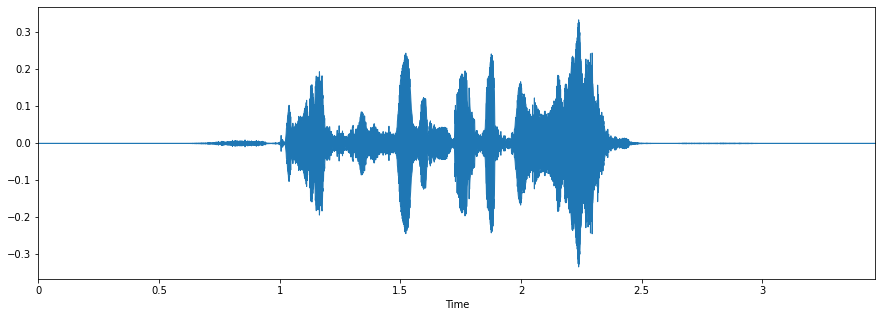

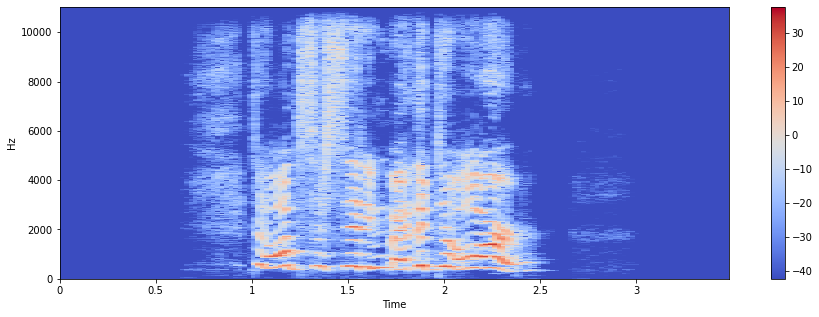

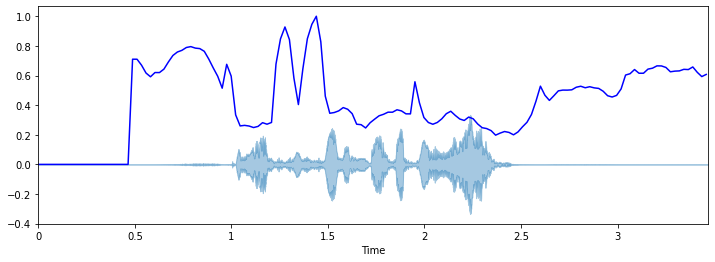

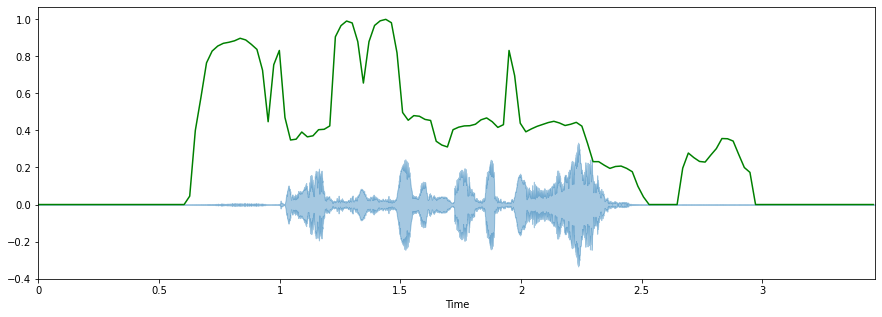

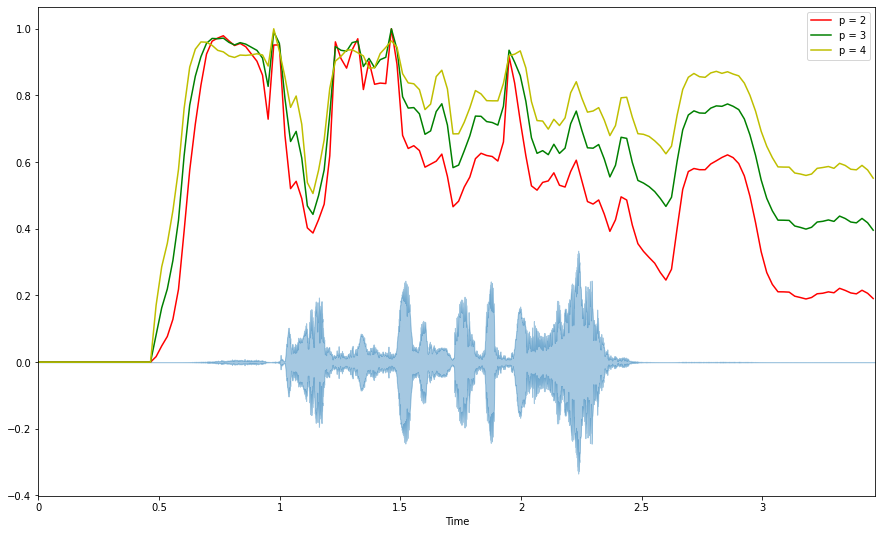

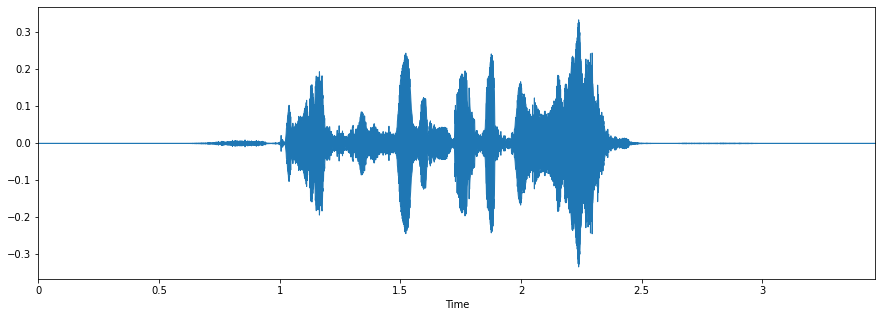

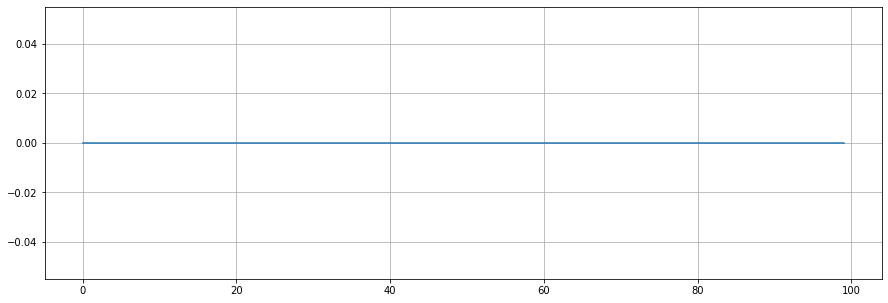

In [14]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#create an Audio Signal------------------------------------------
sampling_rate=22050
T=5.0 #seconds
t=np.linspace(0,T,int(T*sampling_rate), endpoint=False) #time variable
x=0.5*np.sin(2*np.pi*220*t) #pure sine wave at 220Hz
ipd.Audio(x,rate=sampling_rate) #load a numpy array
#-----------------------------------------------------------------

#code to spectral centroid-------------------------------------------
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#---------------------------------------------------------------------

#code to spectral rolloff--------------------------------------------
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')
#----------------------------------------------------------------------

#code to spectral Bandwidth----------------------------------------------------
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#-------------------------------------------------------------------------

#code to Zero-cross rate-------------------------------------------------
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)
n0=9000
n1=9100
plt.figure(figsize=(15,5))
plt.plot(data[n0:n1])
plt.grid()
#--------------------------------------------------------------------------


# Lets play the audio 
ipd.Audio(fname)



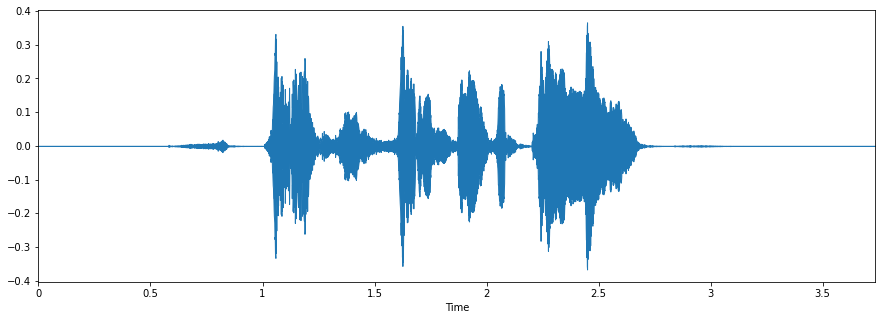

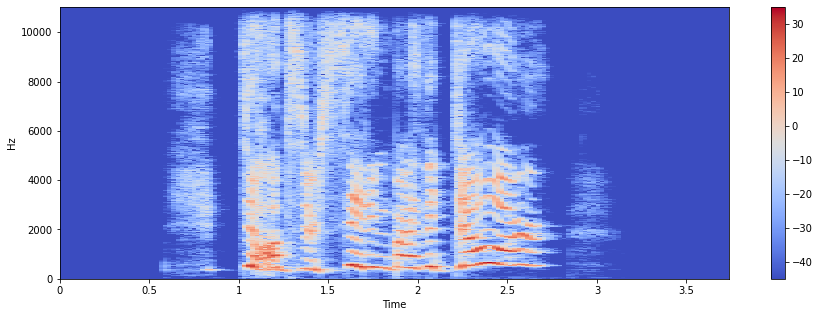

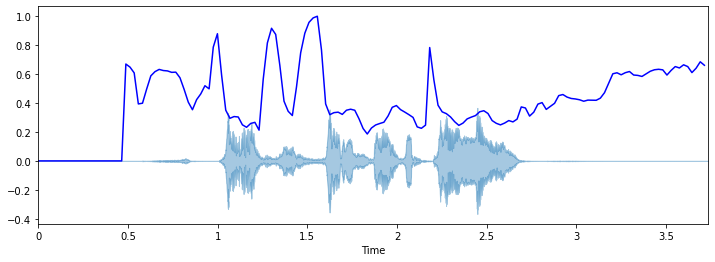

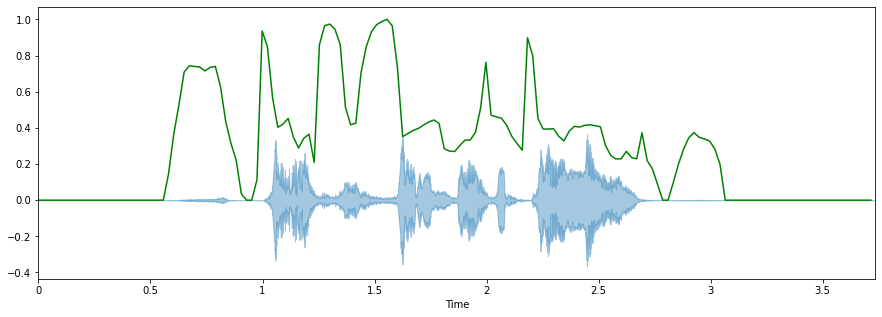

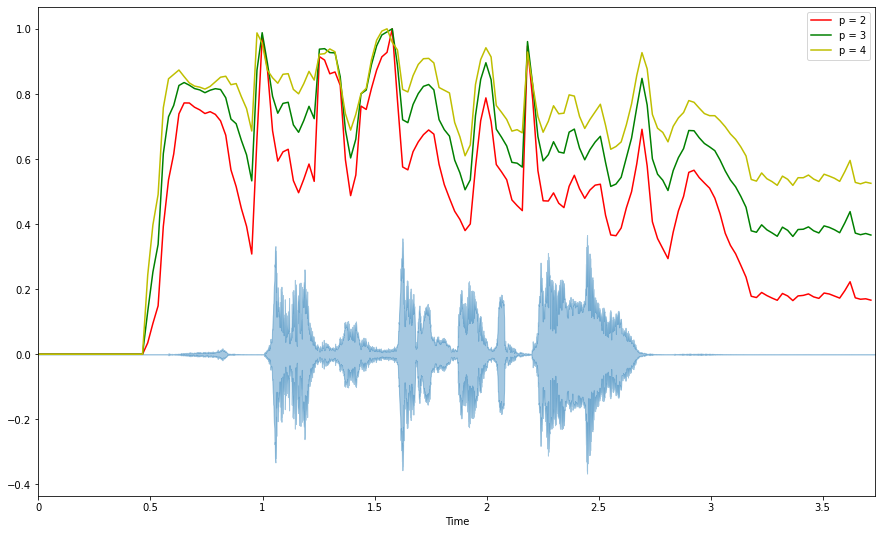

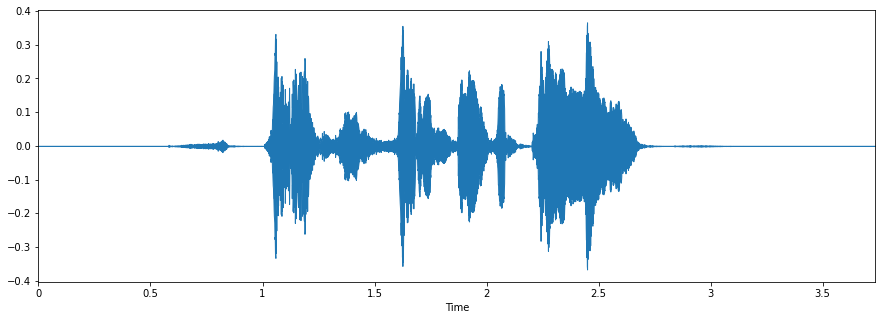

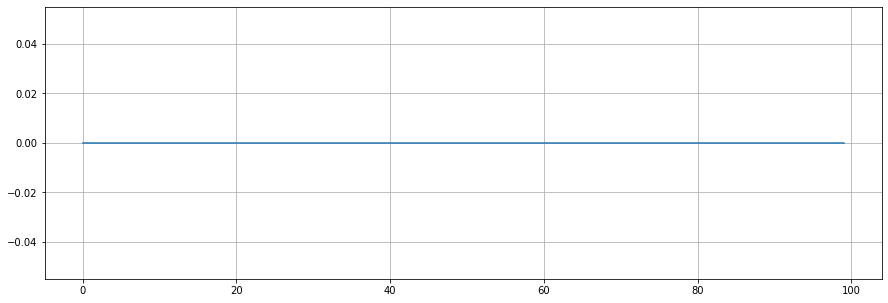

In [15]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#create an Audio Signal------------------------------------------
sampling_rate=22050
T=5.0 #seconds
t=np.linspace(0,T,int(T*sampling_rate), endpoint=False) #time variable
x=0.5*np.sin(2*np.pi*220*t) #pure sine wave at 220Hz
ipd.Audio(x,rate=sampling_rate) #load a numpy array
#-----------------------------------------------------------------

#code to spectral centroid-------------------------------------------
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#---------------------------------------------------------------------

#code to spectral rolloff--------------------------------------------
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')
#----------------------------------------------------------------------

#code to spectral Bandwidth----------------------------------------------------
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#-------------------------------------------------------------------------

#code to Zero-cross rate-------------------------------------------------
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)
n0=9000
n1=9100
plt.figure(figsize=(15,5))
plt.plot(data[n0:n1])
plt.grid()
#--------------------------------------------------------------------------


# Lets play the audio 
ipd.Audio(fname)

<a id="tess"></a>
##  <center> 3. TESS dataset <center>


<a id="tess_load"></a>
###  Load the dataset 


In [16]:
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list, TESS

(['OAF_Fear',
  'OAF_Pleasant_surprise',
  'OAF_Sad',
  'OAF_angry',
  'OAF_disgust',
  'OAF_happy',
  'OAF_neutral',
  'YAF_angry',
  'YAF_disgust',
  'YAF_fear',
  'YAF_happy',
  'YAF_neutral',
  'YAF_pleasant_surprised',
  'YAF_sad'],
 '/content/tess toronto emotional speech set data//TESS Toronto emotional speech set data/')

In [17]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: labels, dtype: int64

<a id="tess_explore"></a>
### Explore the data
400 files for each key emotion. 

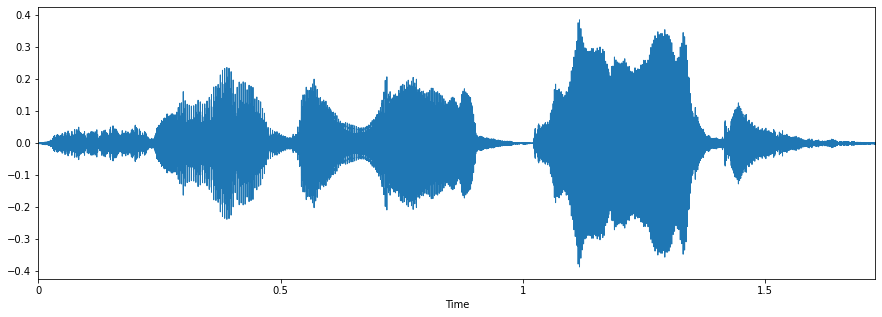

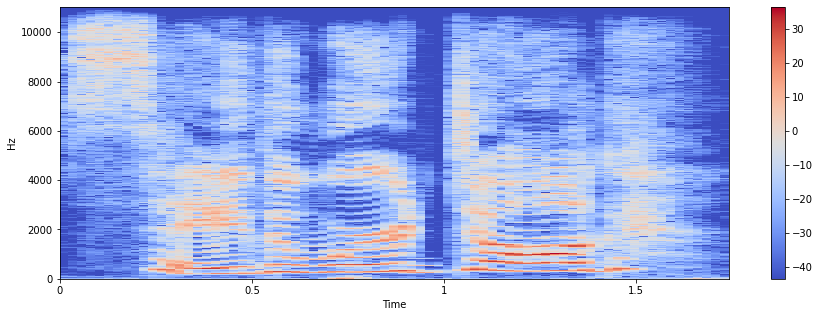

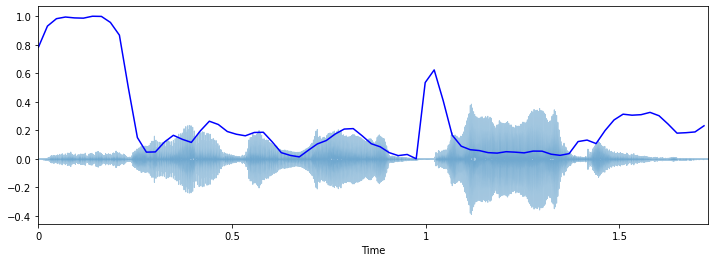

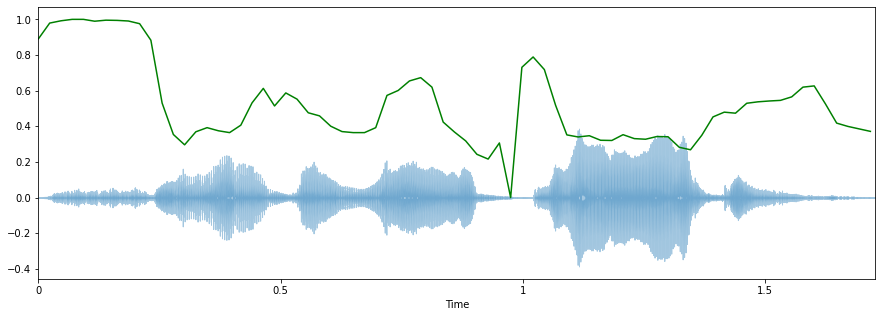

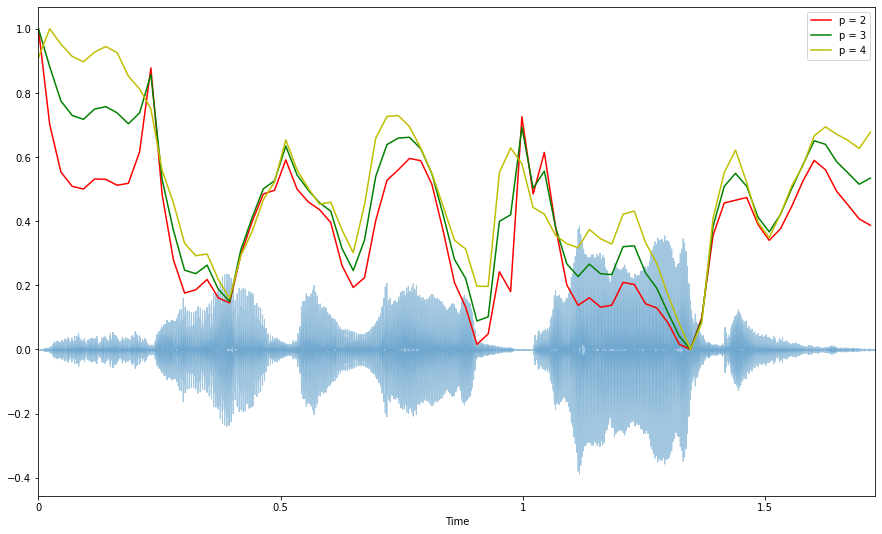

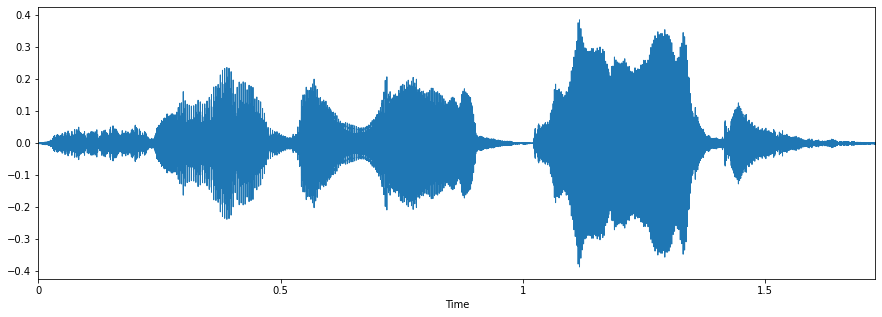

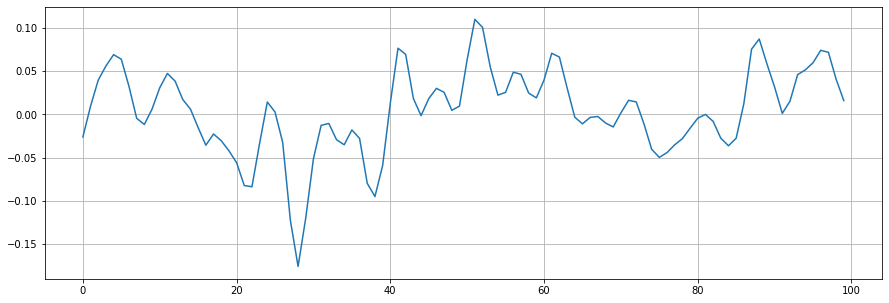

In [18]:
# lets play a fearful track 

fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#create an Audio Signal------------------------------------------
sampling_rate=22050
T=5.0 #seconds
t=np.linspace(0,T,int(T*sampling_rate), endpoint=False) #time variable
x=0.5*np.sin(2*np.pi*220*t) #pure sine wave at 220Hz
ipd.Audio(x,rate=sampling_rate) #load a numpy array
#-----------------------------------------------------------------

#code to spectral centroid-------------------------------------------
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#---------------------------------------------------------------------

#code to spectral rolloff--------------------------------------------
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')
#----------------------------------------------------------------------

#code to spectral Bandwidth----------------------------------------------------
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#-------------------------------------------------------------------------

#code to Zero-cross rate-------------------------------------------------
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)
n0=9000
n1=9100
plt.figure(figsize=(15,5))
plt.plot(data[n0:n1])
plt.grid()
#--------------------------------------------------------------------------

# Lets play the audio 
ipd.Audio(fname)

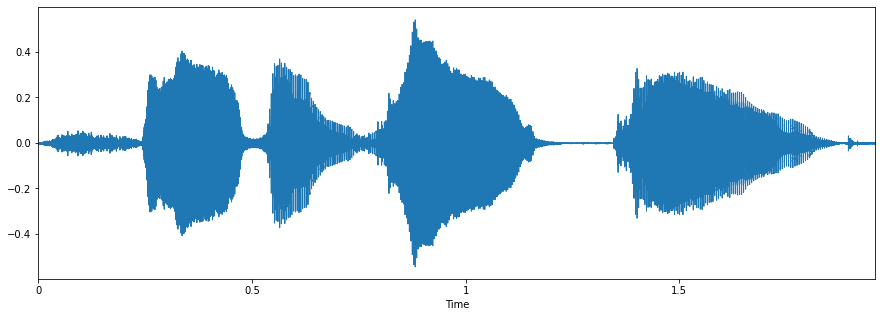

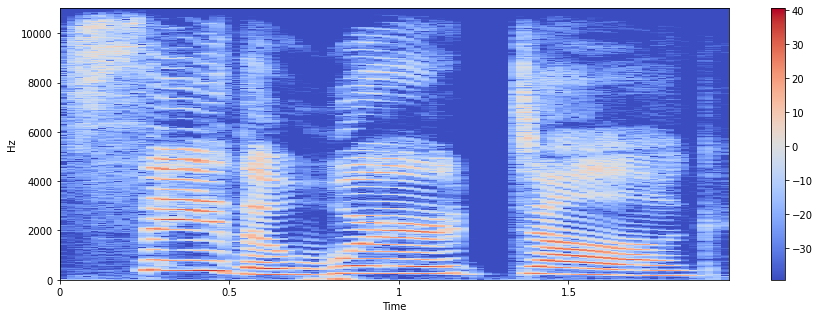

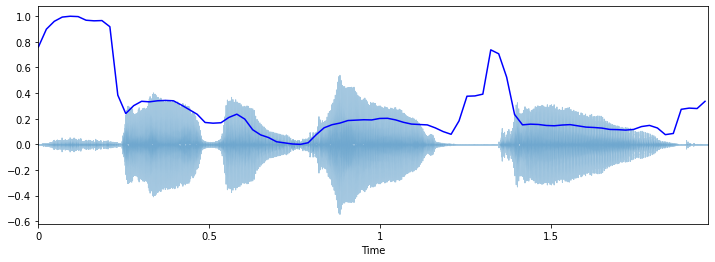

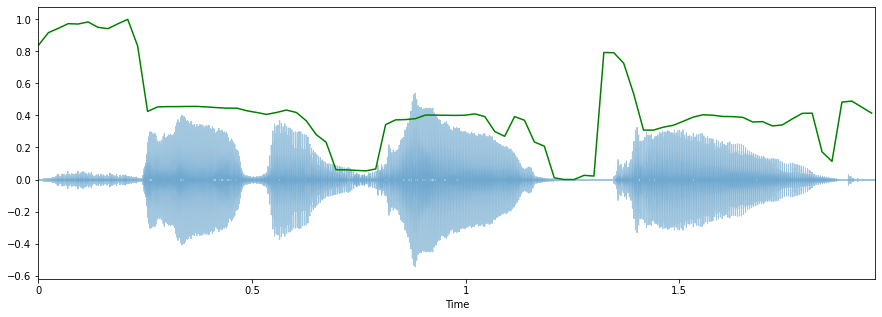

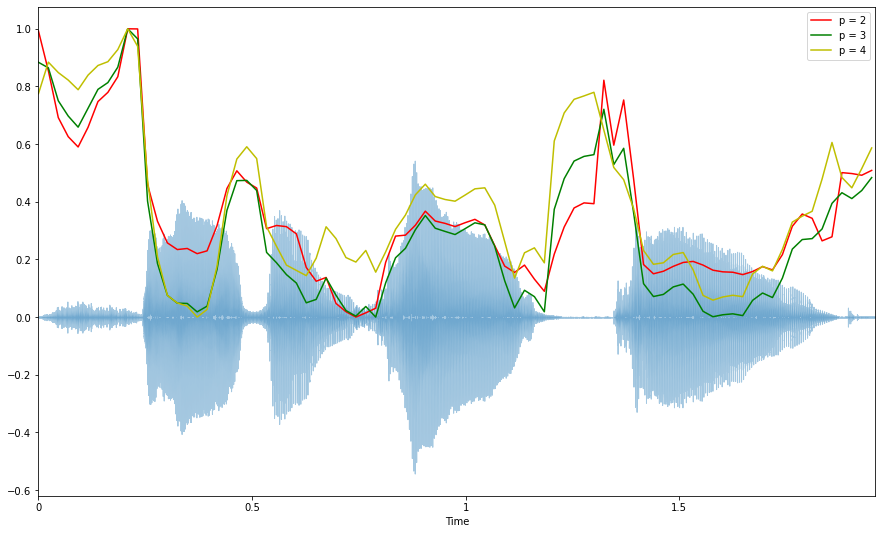

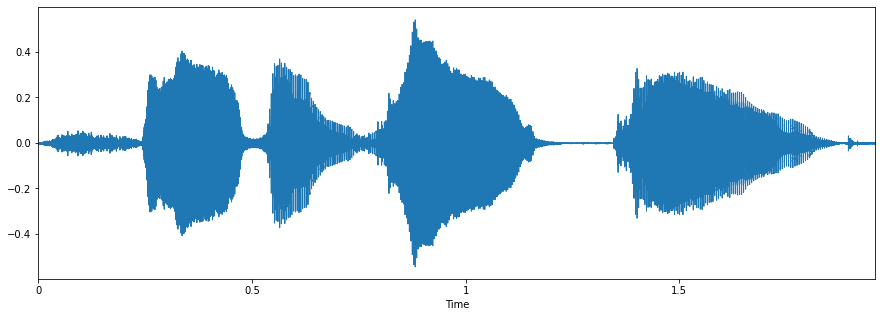

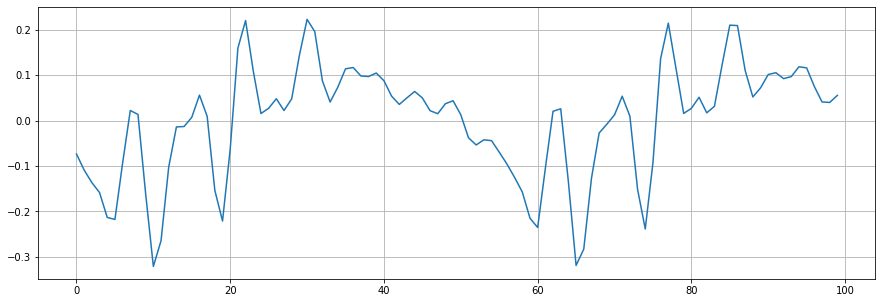

In [19]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#create an Audio Signal------------------------------------------
sampling_rate=22050
T=5.0 #seconds
t=np.linspace(0,T,int(T*sampling_rate), endpoint=False) #time variable
x=0.5*np.sin(2*np.pi*220*t) #pure sine wave at 220Hz
ipd.Audio(x,rate=sampling_rate) #load a numpy array
#-----------------------------------------------------------------

#code to spectral centroid-------------------------------------------
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#---------------------------------------------------------------------

#code to spectral rolloff--------------------------------------------
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')
#----------------------------------------------------------------------

#code to spectral Bandwidth----------------------------------------------------
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#-------------------------------------------------------------------------

#code to Zero-cross rate-------------------------------------------------
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)
n0=9000
n1=9100
plt.figure(figsize=(15,5))
plt.plot(data[n0:n1])
plt.grid()
#--------------------------------------------------------------------------


# Lets play the audio 
ipd.Audio(fname)

<a id="crema"></a>
##  <center> 4. CREMA-D dataset <center>


<a id="crema_load"></a>
###  Load the dataset 


In [20]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [21]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

<a id="crema_explore"></a>
### Explore the data

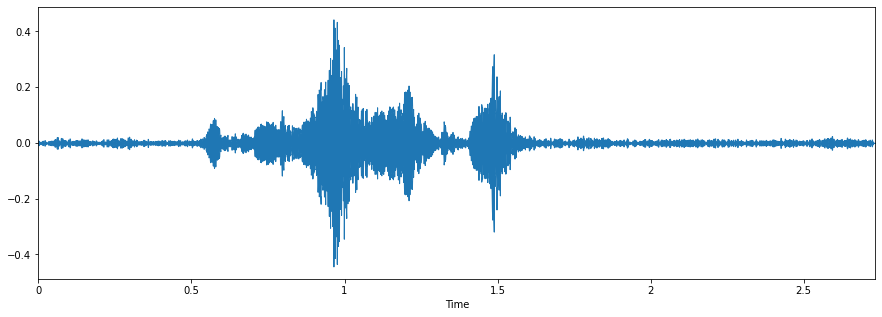

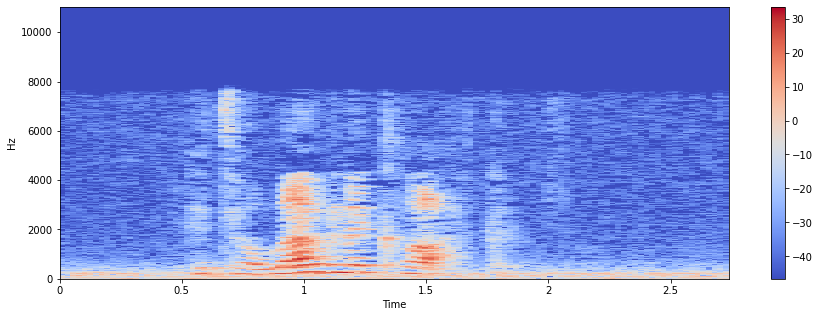

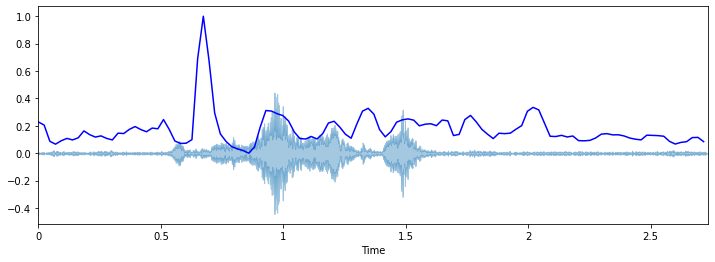

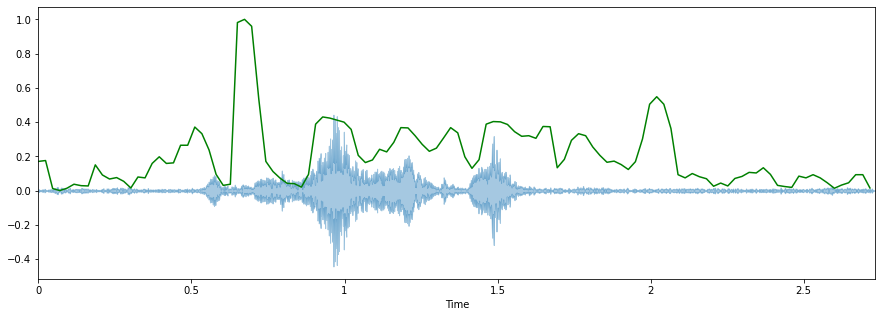

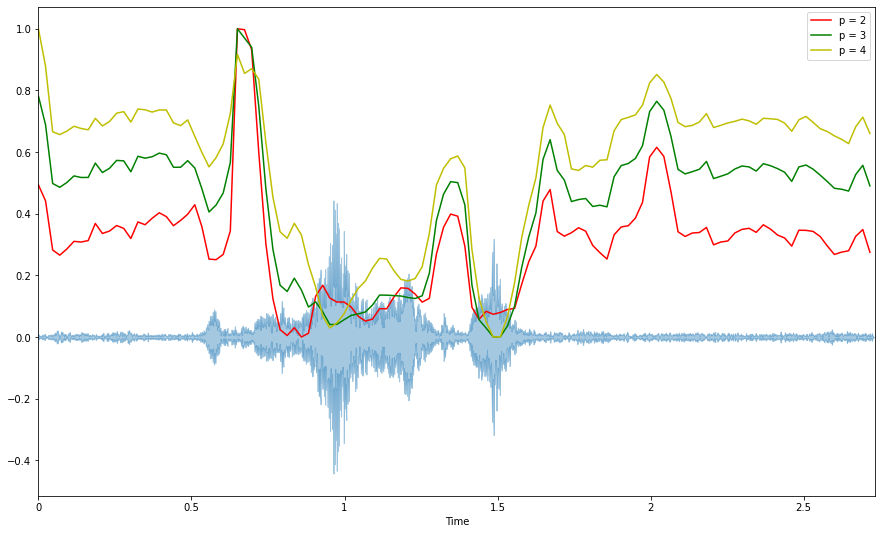

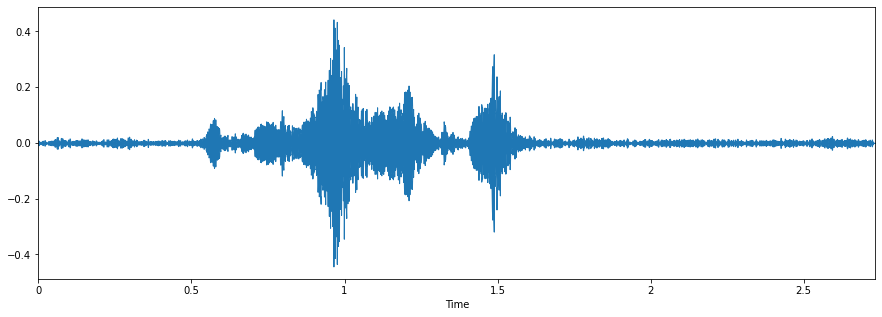

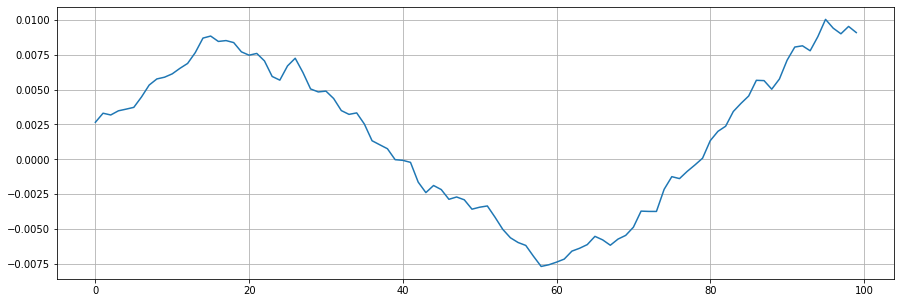

In [22]:
# use the well known Librosa library for this task 
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#create an Audio Signal------------------------------------------
sampling_rate=22050
T=5.0 #seconds
t=np.linspace(0,T,int(T*sampling_rate), endpoint=False) #time variable
x=0.5*np.sin(2*np.pi*220*t) #pure sine wave at 220Hz
ipd.Audio(x,rate=sampling_rate) #load a numpy array
#-----------------------------------------------------------------

#code to spectral centroid-------------------------------------------
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#---------------------------------------------------------------------

#code to spectral rolloff--------------------------------------------
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')
#----------------------------------------------------------------------

#code to spectral Bandwidth----------------------------------------------------
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#-------------------------------------------------------------------------

#code to Zero-cross rate-------------------------------------------------
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)
n0=9000
n1=9100
plt.figure(figsize=(15,5))
plt.plot(data[n0:n1])
plt.grid()
#--------------------------------------------------------------------------

# Lets play the audio 
ipd.Audio(fname)

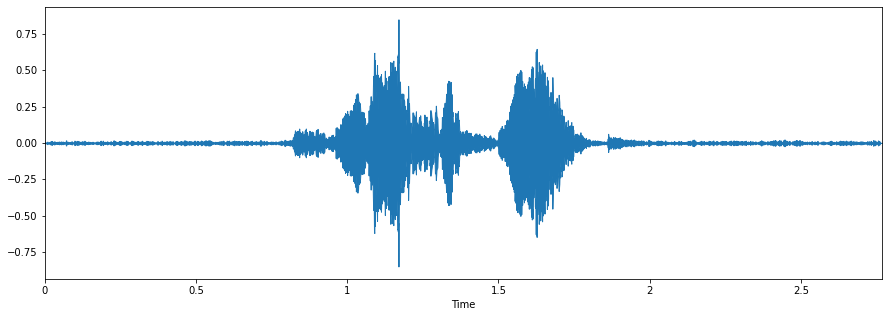

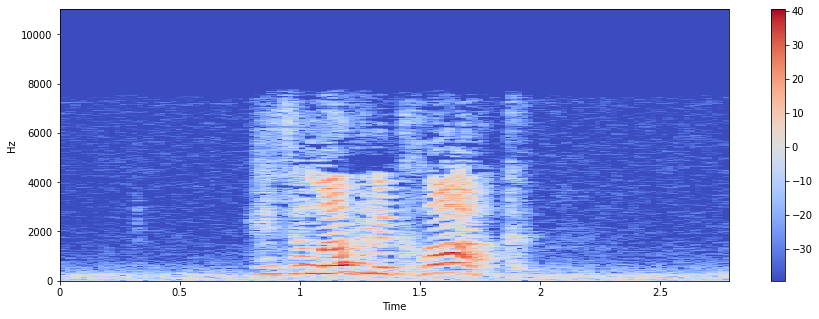

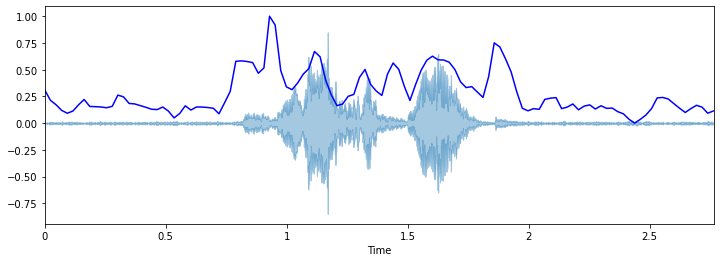

In [23]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


# y_harmonic, y_percussive = librosa.effects.hpss(data)
# plt.figure(figsize=(15, 5))
# librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.25)
# librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
# plt.title('Harmonic + Percussive')

# Lets play the audio 
ipd.Audio(fname)

In [24]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path.csv",index=False)

female_fear        1096
female_angry       1096
female_sad         1096
female_happy       1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_fear           827
male_angry          827
male_disgust        827
male_sad            827
male_happy          827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


In [ ]:
from librosa.util.exceptions import LibrosaError
#code to convert mp3 to .wav format
orig_track='/content/Alan-Walker-Huang-Xiaoyun-Sad-Sometimes.mp3'
con_track='/content/Alan-Walker-Huang-Xiaoyun-Sad-Sometimes.wav'
sound=AudioSegment.from_mp3(orig_track)
sound.export(con_track,format="wav")

sample_track=con_track
data,sampling_rate=librosa.load(sample_track)
print(type(data), type(sampling_rate))
plt.figure(figsize=(15,5))
librosa.display.waveplot(data,sr=sampling_rate)

#code to spectogram
X=librosa.stft(data)
Xdb=librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15,5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()

#create an Audio Signal------------------------------------------
sampling_rate=22050
T=5.0 #seconds
t=np.linspace(0,T,int(T*sampling_rate), endpoint=False) #time variable
x=0.5*np.sin(2*np.pi*220*t) #pure sine wave at 220Hz
ipd.Audio(x,rate=sampling_rate) #load a numpy array
#-----------------------------------------------------------------

#code to spectral centroid-------------------------------------------
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sampling_rate)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
#---------------------------------------------------------------------

#code to spectral rolloff--------------------------------------------
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01, sr=sampling_rate)[0]
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')
#----------------------------------------------------------------------

#code to spectral Bandwidth----------------------------------------------------
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data+0.01, sr=sampling_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(data, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

#-------------------------------------------------------------------------

#code to Zero-cross rate-------------------------------------------------
plt.figure(figsize=(15,5))
librosa.display.waveplot(data, sr=sampling_rate)
n0=9000
n1=9100
plt.figure(figsize=(15,5))
plt.plot(data[n0:n1])
plt.grid()
#--------------------------------------------------------------------------

#play audio
ipd.Audio(sample_track)
Fs, data=read(con_track)
data=data[:,0]
print("Sampling frequency is ",Fs)
Audio(data, rate=Fs)




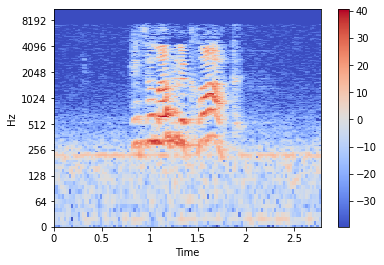

In [26]:
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()

In [27]:
sampling_rate=22050
T=5.0 #seconds
t=np.linspace(0,T,int(T*sampling_rate), endpoint=False) #time variable
x=0.5*np.sin(2*np.pi*220*t) #pure sine wave at 220Hz
ipd.Audio(x,rate=sampling_rate) #load a numpy array


**Feature extraction from Audio signal**
 
Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.

The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

1. **Spectral Centroid**

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:
2. **Spectral Rolloff**

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.


!spleeter separate -i content/Alan-Walker-Huang-Xiaoyun-Sad-Sometimes.mp3 -p spleeter:4stems -o output

In [28]:
!spleeter separate -i content/Alan-Walker-Huang-Xiaoyun-Sad-Sometimes.mp3 -p spleeter:4stems -o output/

Usage: spleeter separate [OPTIONS] FILES...
Try 'spleeter separate --help' for help.

Error: Missing argument 'FILES...'.


**audio processing sample code librosa**

---


In [29]:
y,sr=librosa.load(librosa.ex('fishin'), duration=120)
S_full, phase = librosa.magphase(librosa.stft(y))

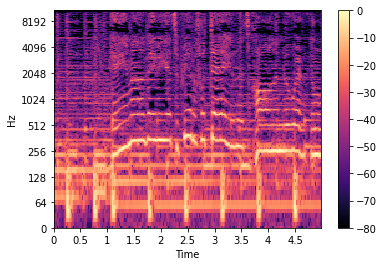

In [30]:
idx = slice(*librosa.time_to_frames([10, 15], sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax)

In [31]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)

In [32]:
margin_i, margin_v = 2, 10
power = 2
mask_i = librosa.util.softmask(S_filter, margin_i * (S_full - S_filter), power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components

S_foreground = mask_v * S_full
S_background = mask_i * S_full

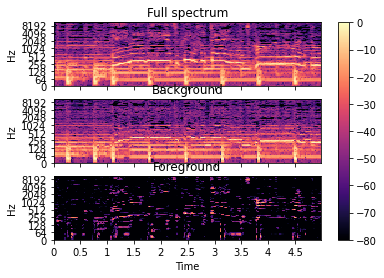

In [33]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Full spectrum')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title='Background')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[2])
ax[2].set(title='Foreground')
fig.colorbar(img, ax=ax)

In [34]:
y_foreground = librosa.istft(S_foreground * phase)



---



---



In [35]:
!spleeter separate -i  -p spleeter:4stems -o output/

Usage: spleeter separate [OPTIONS] FILES...
Try 'spleeter separate --help' for help.

Error: Invalid value for 'FILES...': File 'spleeter:4stems' does not exist.


In [36]:
!spleeter separate --help

Usage: spleeter separate [OPTIONS] FILES...

  Separate audio file(s)

Arguments:
  FILES...  List of input audio file path
            [required]


Options:
  -i, --inputs TEXT               (DEPRECATED)
                                  placeholder for
                                  deprecated input
                                  option

  -a, --adapter TEXT              Name of the
                                  audio adapter to
                                  use for audio
                                  I/O  [default: s
                                  pleeter.audio.ff
                                  mpeg.FFMPEGProce
                                  ssAudioAdapter]

  -b, --bitrate TEXT              Audio bitrate to
                                  be used for the
                                  separated output
                                  [default: 128k]

  -c, --codec [wav|mp3|ogg|m4a|wma|flac]
                                  Audio codec to
          

In [37]:
!spleeter separate -i /content/Alan-Walker-Huang-Xiaoyun-Sad-Sometimes.mp3

Usage: spleeter separate [OPTIONS] FILES...
Try 'spleeter separate --help' for help.

Error: Missing argument 'FILES...'.


In [38]:
# new_y = librosa.istft(S_foreground*phase)
# librosa.output.write_wav("./new-audio.wav", new_y, sr)

In [39]:
# new_y = librosa.istft(S_foreground*phase)
# librosa.output.write_wav("./new-audio.wav", new_y, sr)

In [40]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: keras-nightly 2.5.0.dev2021032900
Uninstalling keras-nightly-2.5.0.dev2021032900:
  Successfully uninstalled keras-nightly-2.5.0.dev2021032900
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.5.0
Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0


In [41]:
!pip install sklearn
!pip install tensorflow==2.3.0
!pip install keras==2.4

     |████████████████████████████████| 320.4 MB 42 kB/s 
     |████████████████████████████████| 2.9 MB 28.7 MB/s 
     |████████████████████████████████| 20.1 MB 14.1 MB/s 
     |████████████████████████████████| 42 kB 912 kB/s 
     |████████████████████████████████| 459 kB 63.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's dependency resolver does not currently take into ac

     |████████████████████████████████| 170 kB 5.3 MB/s 


**TRAINING**

In [42]:
pip install keras

In [43]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sklearn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pathlib
import csv 
import warnings
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import keras
# from keras import layers
# from keras.models import Sequential
warnings.filterwarnings('ignore')

In [44]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'OAF_Fear OAF_Pleasant_surprise OAF_Sad OAF_angry OAF_happy OAF_neutral YAF_angry YAF_disgust YAF_fear YAF_happy YAF_neutral YAF_pleasant_surprised YAF_sad'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/TESS Toronto emotional speech set data/{g}'):
        songname = f'/content/TESS Toronto emotional speech set data/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

In [45]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

Extracting features from spectogram

In [46]:
import csv
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'OAF_Fear OAF_Pleasant_surprise OAF_Sad OAF_angry OAF_happy OAF_neutral YAF_angry YAF_disgust YAF_fear YAF_happy YAF_neutral YAF_pleasant_surprised YAF_sad'.split()
for g in genres:
    for filename in os.listdir(f'/content/TESS Toronto emotional speech set data/{g}'):
        songname = f'/content/TESS Toronto emotional speech set data/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

Data Preprocessing

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# X = StandardScaler().fit_transform(X)
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
!pip install sequential
!pip install tensorflow
!pip install keras

  Created wheel for sequential: filename=sequential-1.0.0-py3-none-any.whl size=2878 sha256=6e5b44921c45d29e10ebd7bba1112b410770177da62adf3bddd3263c91463046
  Stored in directory: /root/.cache/pip/wheels/36/1a/15/0286e549c5261b90879e5e7baa6ce8544d8c32db1d61b62e0a
Successfully built sequential


In [49]:
pip install Tokenizer

     |████████████████████████████████| 77 kB 3.0 MB/s 


In [50]:
!pip3 uninstall tensorflow 
# !pip3 install tensorflow==2.0
!pip3 install tensorflow_hub latest

Found existing installation: tensorflow 2.3.0
Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 596 kB 5.5 MB/s 
  Created wheel for latest: filename=latest-0.6.0-py3-none-any.whl size=7818 sha256=8ea674a44dc7d56b9965365c876bc04fbe235d5f9a40aeb32696827462ad1305
  Stored in directory: /root/.cache/pip/wheels/35/01/f4/9d0427fea34291711aa6ceb72601207941977f19a9ce5ff036
Successfully built latest
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAM

In [51]:
!pip install --upgrade tensorflow-gpu==2.2.0 --user
!pip uninstall tensorflow-datasets
!pip install tensorflow-datasets==4.0.0

     |████████████████████████████████| 516.2 MB 2.9 kB/s 
     |████████████████████████████████| 454 kB 66.6 MB/s 
     |████████████████████████████████| 3.0 MB 54.1 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Found existing installation: tensorflow-datasets 4.0.1
Uninstalling tensorflow-datasets-4.0.1:
  Would remove:
    /usr/local/bin/tfds
    /usr/local/lib/python3.7/dist-packages/tensorflow_datasets-4.0.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow_datasets/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-datasets-4.0.1
     |████████████████████████████████| 3.5 MB 5.1 MB/s 


In [52]:
!pip install --upgrade pip
!pip uninstall tensorflow
!pip install tensorflow

     |████████████████████████████████| 2.1 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.5/497.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.0
    Uninstalling Keras-2.4.0:
      Successfully uninstalled Keras-2.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstall

In [53]:
from tensorflow.keras import models
from tensorflow.keras import preprocessing

In [54]:
from tensorflow.keras import Sequential
from tensorflow.keras import models
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [117]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from keras.models import Sequential
# import tensorflow
# from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
# from tensorflow.keras import layers



In [144]:
# model = Sequential()
model = keras.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(14, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [145]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
17/17 [==============================] - 1s 9ms/step - loss: 2.0106 - accuracy: 0.5697
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5900 - accuracy: 0.9303
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.1472 - accuracy: 0.9798
Epoch 4/100
17/17

In [146]:
pip install keras

In [147]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import tensorflow
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from tensorflow.keras.models import Sequential
# from keras.optimizers import SGD

In [148]:
genres = 'OAF_Fear OAF_Pleasant_surprise OAF_Sad OAF_angry OAF_happy OAF_neutral YAF_angry YAF_disgust YAF_fear YAF_happy YAF_neutral YAF_pleasant_surprised YAF_sad'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/TESS Toronto emotional speech set data/{g}'):
        songname = f'/content/TESS Toronto emotional speech set data/{g}/{filename}'
        data, sr = librosa.load(songname, mono=True, duration=5)
        print(data.shape)
        plt.specgram(data, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

(34922,)
(37561,)
(38334,)
(33971,)
(33425,)
(33339,)
(36696,)
(37686,)
(37120,)
(36531,)
(38914,)
(34421,)
(36933,)
(34487,)
(34402,)
(39069,)
(32375,)
(34696,)
(36147,)
(37094,)
(37042,)
(37220,)
(34075,)
(43793,)
(33895,)
(38117,)
(36920,)
(32695,)
(31431,)
(34363,)
(30791,)
(37198,)
(41521,)
(32640,)
(30582,)
(35718,)
(34838,)
(35748,)
(35029,)
(37673,)
(37833,)
(37363,)
(40492,)
(37525,)
(37074,)
(38319,)
(31380,)
(34683,)
(36021,)
(40328,)
(33463,)
(32232,)
(39763,)
(32805,)
(33177,)
(34866,)
(28618,)
(34030,)
(35489,)
(28849,)
(30761,)
(35607,)
(32504,)
(38715,)
(38142,)
(35186,)
(33040,)
(30137,)
(34919,)
(34763,)
(28597,)
(34316,)
(36522,)
(37258,)
(33701,)
(33773,)
(36862,)
(34581,)
(34525,)
(36403,)
(35391,)
(35279,)
(36620,)
(32051,)
(34964,)
(36035,)
(31888,)
(35134,)
(34907,)
(36544,)
(38157,)
(31930,)
(35470,)
(33971,)
(37627,)
(32150,)
(41215,)
(34871,)
(32098,)
(37715,)
(35155,)
(39143,)
(34336,)
(37372,)
(37954,)
(41794,)
(33381,)
(33956,)
(33220,)
(33405,)
(37302,)
(

<Figure size 432x288 with 0 Axes>

In [149]:
pip install split-folders

In [150]:
import splitfolders
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio('./img_data/', output="./data", seed=1337, ratio=(.8, .2)) # default values

Copying files: 2600 files [00:00, 2872.28 files/s]


In [151]:
!pip uninstall keras
!pip uninstall tensorflow
!pip install tensorflow
!pip install keras

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-2.8.0
Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.8.0
  Using cached tensorflow-2.8.0-cp37-cp37m-manylinux2010_x86_64.whl (497.5 MB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
ERROR: pip's dependency resolver does not cu

In [152]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True) # image will be flipper horiztest_datagen = ImageDataGenerator(rescale=1./255)

In [153]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True) # image will be flipper horiztest_datagen = ImageDataGenerator(rescale=1./255)

In [154]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [155]:
training_set = train_datagen.flow_from_directory(
        './data/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)
test_set = test_datagen.flow_from_directory('./data/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False )

Found 2080 images belonging to 13 classes.
Found 520 images belonging to 13 classes.


In [156]:
model = keras.Sequential()
input_shape=(64, 64, 3)#1st hidden layer
model.add(Conv2D(32, (3, 3), strides=(2, 2), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))#2nd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))#3rd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))#Flatten
model.add(Flatten())
model.add(Dropout(rate=0.5))#Add fully connected layer.
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 31, 31, 32)        896       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 15, 15, 32)        0         
_________________________________________________________________
activation_25 (Activation)   (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
average_pooling2d_16 (Averag (None, 7, 7, 64)          0         
_________________________________________________________________
activation_26 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 64)        

In [157]:
from tensorflow.keras.optimizers import SGD, Adam

In [158]:
epochs = 200
batch_size = 8
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [160]:
model.fit_generator(
        training_set,
        steps_per_epoch=100,
        epochs=50,
        validation_data=test_set,
        validation_steps=200)

Epoch 1/50


InvalidArgumentError: ignored

In [ ]:
#Model Evaluation
model.evaluate_generator(generator=test_set, steps=50)#OUTPUT
[1.704445120342617, 0.33798882681564246]

In [ ]:
test_set.reset()
pred = model.predict_generator(test_set, steps=50, verbose=1)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions = predictions[:200]
filenames=test_set.filenames

In [ ]:
print(len(filename, len(predictions)))
# (200, 200)

In [ ]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions},orient='index')
results.to_csv("prediction_results.csv",index=False)